In [45]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [47]:
# Image size and batch size for the dataset
image_size = (128, 128)  # Resize all images to this size
batch_size = 32


In [3]:
# Define the paths to your dataset (update these paths with your actual folder location)
train_data_path = r"C:\Users\mp406\Desktop\potholedetection\datasets\train"
validation_data_path = r"C:\Users\mp406\Desktop\potholedetection\datasets\validation"


In [4]:
# Define ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to [0, 1]
    horizontal_flip=True,       # Randomly flip images horizontally
    rotation_range=20,          # Randomly rotate images
    zoom_range=0.2              # Randomly zoom images
)



In [5]:
# Define ImageDataGenerator for validation data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization



In [6]:
# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_data_path,            # Path to the training data folder
    target_size=image_size,     # Resize all images to (128, 128)
    batch_size=batch_size,      # Batch size for training
    class_mode='binary'         # Binary classification (pothole vs no_pothole)
)



Found 681 images belonging to 2 classes.


In [7]:
# Load the validation data
validation_generator = test_datagen.flow_from_directory(
    validation_data_path,       # Path to the validation data folder
    target_size=image_size,     # Resize all images to (128, 128)
    batch_size=batch_size,      # Batch size for validation
    class_mode='binary'         # Binary classification (pothole vs no_pothole)
)


Found 120 images belonging to 2 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Build the CNN Model
model = Sequential([
    Input(shape=(128, 128, 3)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

model.summary()  # To verify the model structure




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [19]:
# Train the model
history = model.fit(
    train_generator,               # Training data
    epochs=10,                     # Number of epochs to train
    validation_data=validation_generator  # Validation data
)



Epoch 1/10


C:\Users\mp406\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 834ms/step - accuracy: 0.5184 - loss: 1.3906 - val_accuracy: 0.8250 - val_loss: 0.4551
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 683ms/step - accuracy: 0.7773 - loss: 0.4630 - val_accuracy: 0.9250 - val_loss: 0.2186
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 711ms/step - accuracy: 0.8114 - loss: 0.3855 - val_accuracy: 0.9167 - val_loss: 0.2154
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 696ms/step - accuracy: 0.8520 - loss: 0.3780 - val_accuracy: 0.9083 - val_loss: 0.1818
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 721ms/step - accuracy: 0.8822 - loss: 0.3138 - val_accuracy: 0.9250 - val_loss: 0.1929
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 713ms/step - accuracy: 0.8626 - loss: 0.3590 - val_accuracy: 0.9500 - val_loss: 0.1239
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 690ms/step - accuracy: 0.9110 - loss: 0.2464 - val_accuracy: 0.9583 - val_loss: 0.1221
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 735ms/step - accuracy: 0.8953 - loss: 0.2405 - val_accuracy: 0.925

In [23]:
# Save the model
model.save('pothole_detection_model.h5')


In [25]:
# Print overall accuracy and loss after training
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")


Training Accuracy: 0.9134
Validation Accuracy: 0.9667
Training Loss: 0.2114
Validation Loss: 0.1261


In [27]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

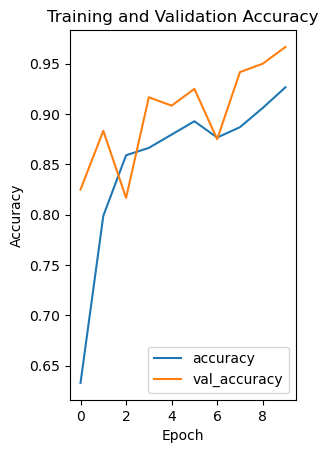

In [39]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


Text(0.5, 1.0, 'Training and Validation Loss')

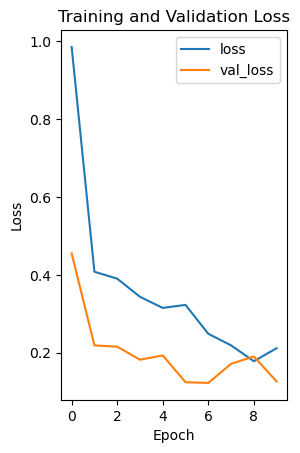

In [29]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [31]:
plt.show()


In [37]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the image
image_path = r"C:\Users\mp406\Downloads\WhatsApp Image 2025-01-10 at 12.19.18_c9736c88.jpg"

# Load and preprocess the image
image = load_img(image_path, target_size=(128, 128))  # Resize to match model input
image = img_to_array(image)  # Convert to array
image = image / 255.0  # Normalize pixel values to [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension, shape becomes (1, 128, 128, 3)

# Predict if the image has a pothole or not
prediction = model.predict(image)
if prediction[0] > 0.5:
    print(f"Pothole detected in the image: {image_path}")
else:
    print(f"No pothole detected in the image: {image_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Pothole detected in the image: C:\Users\mp406\Downloads\WhatsApp Image 2025-01-10 at 12.19.18_c9736c88.jpg


In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the image
image_path = r"C:\Users\mp406\Downloads\WhatsApp Image 2025-01-10 at 12.19.18_1b0ebd29.jpg"

# Load and preprocess the image
image = load_img(image_path, target_size=(128, 128))  # Resize to match model input
image = img_to_array(image)  # Convert to array
image = image / 255.0  # Normalize pixel values to [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension, shape becomes (1, 128, 128, 3)

# Predict if the image has a pothole or not
prediction = model.predict(image)
if prediction[0] > 0.5:
    print(f"Pothole detected in the image: {image_path}")
else:
    print(f"No pothole detected in the image: {image_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
No pothole detected in the image: C:\Users\mp406\Downloads\WhatsApp Image 2025-01-10 at 12.19.18_1b0ebd29.jpg


In [51]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the image
image_path = r"C:\Users\mp406\Desktop\download (7).jpg"

# Load and preprocess the image
image = load_img(image_path, target_size=(128, 128))  # Resize to match model input
image = img_to_array(image)  # Convert to array
image = image / 255.0  # Normalize pixel values to [0, 1]
image = np.expand_dims(image, axis=0)  # Add batch dimension, shape becomes (1, 128, 128, 3)

# Predict if the image has a pothole or not
prediction = model.predict(image)
if prediction[0] > 0.5:
    print(f"Pothole detected in the image: {image_path}")
else:
    print(f"No pothole detected in the image: {image_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Pothole detected in the image: C:\Users\mp406\Desktop\download (7).jpg
